In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime, timedelta
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu

                                                    # Задание 1
                                Retention – один из самых важных показателей в компании. 
    Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

In [2]:
reg_data_df = pd.read_csv("../shared/problem1-reg_data.csv", sep=";")  # данные о времени регистрации

In [3]:
reg_data_df.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [4]:
reg_data_df.duplicated().sum()

0

In [5]:
auth_data_df = pd.read_csv("../shared/problem1-auth_data.csv", sep=";")  # данные о времени захода пользователей в игру

In [6]:
auth_data_df.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [7]:
auth_data_df.duplicated().sum()

0

In [8]:
auth_data_df.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [9]:
# Преобразование типов данных (reg_ts и auth_ts)
reg_data_df['reg_ts'] = reg_data_df['reg_ts'].astype(int)
auth_data_df['auth_ts'] = auth_data_df['auth_ts'].astype(int)
reg_data_df['reg_date'] = pd.to_datetime(reg_data_df['reg_ts'], unit='s')
auth_data_df['auth_date'] = pd.to_datetime(auth_data_df['auth_ts'], unit='s')
reg_data_df.drop(columns=['reg_ts'], inplace=True)
auth_data_df.drop(columns=['auth_ts'], inplace=True)

In [10]:
reg_data_df.head()

,uid,reg_date
0,1,1998-11-18 09:43:43
1,2,1999-07-22 22:38:09
2,3,2000-01-13 22:27:27
3,4,2000-05-28 14:19:01
4,5,2000-09-16 11:21:53


In [11]:
auth_data_df.head()

,uid,auth_date
0,1,1998-11-18 09:43:43
1,2,1999-07-22 22:38:09
2,2,1999-07-25 16:46:46
3,2,1999-07-31 03:50:15
4,2,1999-08-05 17:49:39


In [12]:
# Объединение данных 
merged_data = reg_data_df.merge(auth_data_df, on='uid', how='left')

# Расчёт дней с момента регистрации
merged_data['days_since_reg'] = (merged_data['auth_date'] - merged_data['reg_date']).dt.days

In [13]:
merged_data.head(10)

,uid,reg_date,auth_date,days_since_reg
0,1,1998-11-18 09:43:43,1998-11-18 09:43:43,0
1,2,1999-07-22 22:38:09,1999-07-22 22:38:09,0
2,2,1999-07-22 22:38:09,1999-07-25 16:46:46,2
3,2,1999-07-22 22:38:09,1999-07-31 03:50:15,8
4,2,1999-07-22 22:38:09,1999-08-05 17:49:39,13
5,2,1999-07-22 22:38:09,1999-08-11 11:56:55,19
6,2,1999-07-22 22:38:09,1999-08-14 20:30:33,22
7,2,1999-07-22 22:38:09,1999-08-18 18:56:26,26
8,2,1999-07-22 22:38:09,1999-08-20 09:27:12,28
9,2,1999-07-22 22:38:09,1999-08-26 15:52:32,34


In [14]:
merged_data_sort = merged_data.sort_values(by='days_since_reg', ascending=False)

In [15]:
filtered_data = merged_data_sort.query('days_since_reg > 0')
print(filtered_data)

            uid            reg_date           auth_date  days_since_reg
1929          2 1999-07-22 22:38:09 2020-09-18 11:24:29            7728
1928          2 1999-07-22 22:38:09 2020-09-16 04:27:12            7726
1927          2 1999-07-22 22:38:09 2020-09-10 10:10:21            7720
1926          2 1999-07-22 22:38:09 2020-09-09 09:06:39            7719
1925          2 1999-07-22 22:38:09 2020-09-05 15:18:24            7715
...         ...                 ...                 ...             ...
9096850  899720 2020-05-18 14:16:04 2020-05-20 05:47:51               1
3473360  157919 2017-06-25 14:50:18 2017-06-27 12:56:40               1
7128703  509161 2019-06-07 17:01:11 2019-06-08 19:56:07               1
7452159  555447 2019-07-30 13:06:35 2019-08-01 04:00:01               1
8582188  765340 2020-02-10 05:35:04 2020-02-11 14:10:50               1

[8601013 rows x 4 columns]


                             Функция построения тепловой кагорты Retention Rate (RR) по дням 

Минимальная дата регистрации: 18-11-1998
Максимальная дата авторизации: 23-09-2020
Введите начальную дату (DD-MM-YYYY): 09-09-2020
Напишите число дней для расчёта Retention: 30


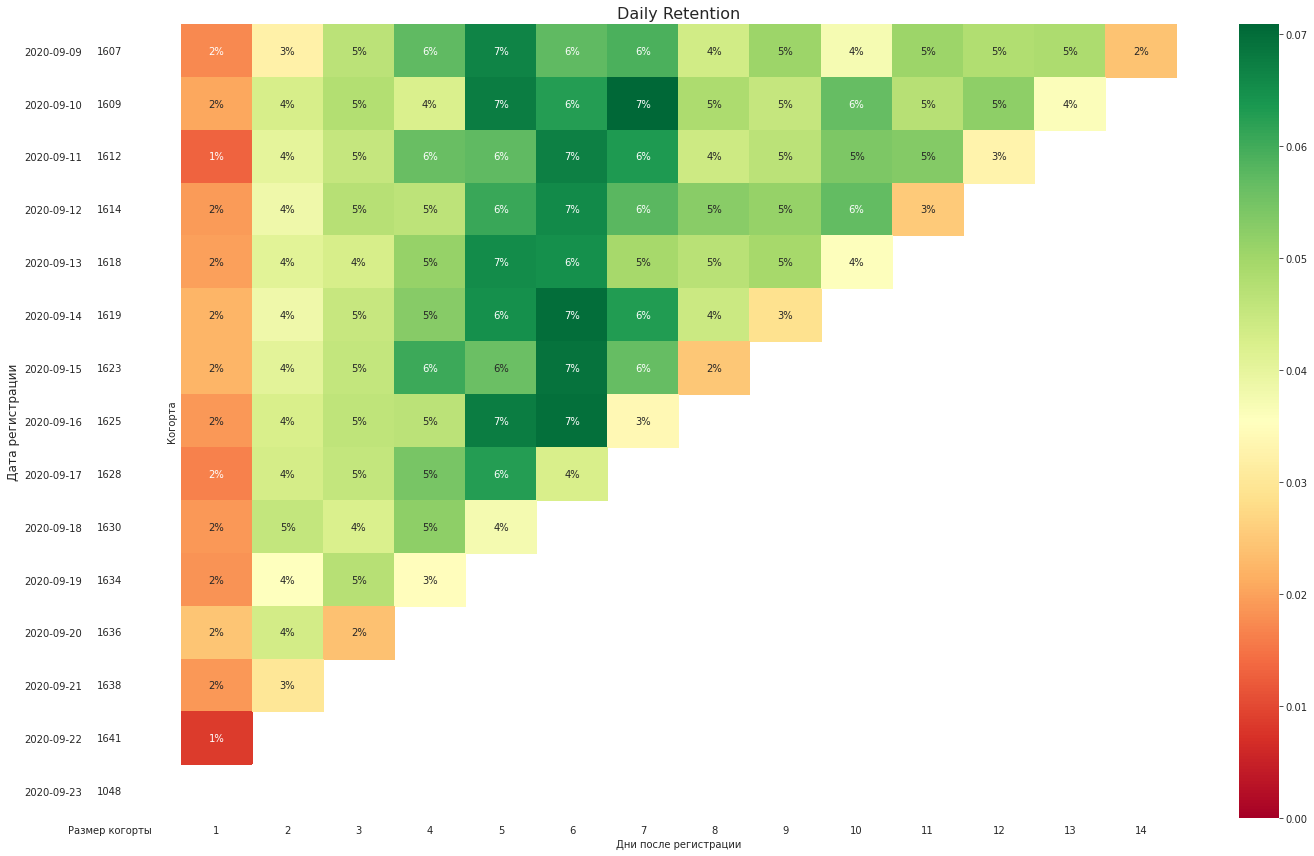

In [16]:
def retention_with_visual():
    """
    Функция для расчета и визуализации RR игроков по дням от даты регистрации.
    Пользователь вводит:
        1) Начальную дату (в формате DD-MM-YYYY)
        2) Количество дней для анализа retention.
    Результатом функции является тепловая карта когортного анализа.
    """

    # Загрузка данных
    reg_data_df = pd.read_csv("../shared/problem1-reg_data.csv", sep=";")
    auth_data_df = pd.read_csv("../shared/problem1-auth_data.csv", sep=";")

    # Преобразование данных
    reg_data_df['reg_ts'] = reg_data_df['reg_ts'].astype(int)
    auth_data_df['auth_ts'] = auth_data_df['auth_ts'].astype(int)
    reg_data_df['registration_date'] = pd.to_datetime(reg_data_df['reg_ts'], unit='s').dt.floor('D')
    auth_data_df['authorization_date'] = pd.to_datetime(auth_data_df['auth_ts'], unit='s').dt.floor('D')

    # Определение минимальной и максимальной даты
    min_reg_date = reg_data_df['registration_date'].min().strftime('%d-%m-%Y')
    max_auth_date = auth_data_df['authorization_date'].max().strftime('%d-%m-%Y')

    print(f"Минимальная дата регистрации: {min_reg_date}")
    print(f"Максимальная дата авторизации: {max_auth_date}")

    # Запрос начальной даты в формате DD-MM-YYYY
    while True:
        start_date_input = input("Введите начальную дату (DD-MM-YYYY): ").strip()
        try:
            start_date = datetime.strptime(start_date_input, "%d-%m-%Y")  # Преобразуем в формат даты
            if start_date < reg_data_df['registration_date'].min() or start_date > auth_data_df['authorization_date'].max():
                print(f"Ошибка: дата должна быть в диапазоне [{min_reg_date}, {max_auth_date}]")
            else:
                break  # Выходим из цикла при корректном вводе
        except ValueError:
            print("Ошибка: введите дату в формате DD-MM-YYYY")

    # Запрос количества дней для анализа retention
    while True:
        try:
            retention_days = int(input("Напишите число дней для расчёта Retention: ").strip())
            if retention_days <= 0:
                print("Ошибка: число должно быть больше 0")
            else:
                break
        except ValueError:
            print("Ошибка: введите только целое число")

    # Определение временного диапазона
    end_date = start_date + timedelta(days=retention_days)

    # Фильтрация данных
    reg_data_filtered = reg_data_df.query('registration_date >= @start_date')
    auth_data_filtered = auth_data_df.query('authorization_date <= @end_date')

    # Проверка наличия данных после фильтрации
    if reg_data_filtered.empty or auth_data_filtered.empty:
        print("Ошибка: нет данных для выбранного периода. Попробуйте другой временной диапазон.")
        return

    # Объединение отфильтрованных данных
    reg_auth_data = reg_data_filtered.merge(auth_data_filtered, on='uid', how='left')

    # Проверка наличия данных после объединения
    if reg_auth_data.empty:
        print("Ошибка: нет совпадений между регистрацией и авторизациями. Попробуйте другой временной диапазон.")
        return

    # Группировка данных по датам регистрации и авторизации
    df_cohort = reg_auth_data.groupby(['registration_date', 'authorization_date'], as_index=False).agg(users=('uid', 'nunique'))

    # Проверка наличия данных после группировки
    if df_cohort.empty:
        print("Ошибка: нет данных для группировки. Попробуйте другой временной диапазон.")
        return

    # Расчет разницы между регистрацией и авторизацией в днях
    df_cohort['days_since_reg'] = (df_cohort['authorization_date'] - df_cohort['registration_date']).dt.days

    # Создаем сводную таблицу для когортного анализа
    cohort_pivot = df_cohort.pivot_table(index='registration_date', columns='days_since_reg', values='users')

    # Проверка наличия данных в сводной таблице
    if cohort_pivot.empty:
        print("Ошибка: невозможно создать сводную таблицу. Попробуйте другой временной диапазон.")
        return

    # Рассчитываем размеры когорт (первый столбец сводной таблицы)
    if len(cohort_pivot.columns) == 0:
        print("Ошибка: нет данных для расчета retention. Попробуйте другой временной диапазон.")
        return

    cohort_size = cohort_pivot.iloc[:, 0]

    # Вычисляем коэффициенты удержания, деля на размер когорты
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

    # Убираем нулевой день для лучшей визуализации
    retention_matrix = retention_matrix.drop(columns=[0], errors='ignore')

    # Строим тепловую карту когортного анализа
    with sns.axes_style('white'):
        fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 30]})

        # Тепловая карта для коэффициентов удержания
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            fmt='.0%',
            cmap='RdYlGn',
            vmin=0.0,
            vmax=retention_matrix.max().max(),
            ax=ax[1]
        )
        ax[1].set_title('Daily Retention', fontsize=16)
        ax[1].set(xlabel='Дни после регистрации', ylabel='Когорта')
        ax[1].tick_params(axis='x', labelsize=10)
        ax[1].tick_params(axis='y', labelsize=10)

        # Тепловая карта для размеров когорт
        cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Размер когорты'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(
            cohort_size_df,
            annot=True,
            cbar=False,
            fmt='g',
            cmap=white_cmap,
            ax=ax[0]
        )
        ax[0].set_ylabel("Дата регистрации", fontsize=12)
        ax[0].set_yticklabels(retention_matrix.index.strftime('%Y-%m-%d'), fontsize=10)

        fig.tight_layout()
        plt.show()


# Пример использования функции
retention_with_visual()

                                                    # Задание 2
    Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений.
    Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.
    Какой набор предложений можно считать лучшим? 
    Какие метрики стоит проанализировать для принятия правильного решения и как? 

In [17]:
df = pd.read_csv("../My_folder/_FINAL project/Проект_1_Задание_2.csv", sep=";")

In [18]:
df.head(15)

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
7,8,0,b
8,9,0,b
9,10,0,a


In [19]:
df.groupby('revenue').head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b
404525,404526,3120,b


In [20]:
df['revenue'].dtype

dtype('int64')

        ARPU          - средняя выручка с пользователя
        ARPPU         - средняя выручка с платящего пользователя
        CR            - процент конверсии в платящего игрока/пользователя
        Total Revenue - итоговая выручка с каждой из групп

In [21]:
# Количество пользователей в каждой группе
total_users_a = 202103
total_users_b = 202667

# Количество платящих пользователей
paying_users_a = 1928
paying_users_b = 1805

# CR - процент конверсии в платящего
CR_a = (paying_users_a / total_users_a) * 100
CR_b = (paying_users_b / total_users_b) * 100

print(f"CR Контрольная группа (A):{CR_a:.2}%")
print(f"CR Тестовая группа (B):{CR_b:.2f}")

CR Контрольная группа (A):0.95%
CR Тестовая группа (B):0.89


In [22]:
# Рассчитываем Total Revenue для групп A и B
total_revenue_a = df[df['testgroup'] == 'a']['revenue'].sum()
total_revenue_b = df[df['testgroup'] == 'b']['revenue'].sum()

# Вывод результатов
print(f"Total Revenue Контрольная группа (A): {total_revenue_a}")
print(f"Total Revenue Тестовая группа (B): {total_revenue_b}")

Total Revenue Контрольная группа (A): 5136189
Total Revenue Тестовая группа (B): 5421603


In [23]:
ARPU_a = total_revenue_a / total_users_a
ARPU_b = total_revenue_b / total_users_b

print(f"ARPU Контрольная группа (A): {ARPU_a:.2f}")
print(f"ARPU Тестовая группа (B): {ARPU_b:.2f}")

ARPU Контрольная группа (A): 25.41
ARPU Тестовая группа (B): 26.75


In [24]:
# Выручка только платящих пользователей
revenue_a_nonzero = df[(df['testgroup'] == 'a') & (df['revenue'] > 0)]['revenue']
revenue_b_nonzero = df[(df['testgroup'] == 'b') & (df['revenue'] > 0)]['revenue']

ARPPU_a = revenue_a_nonzero.mean().round(3)
ARPPU_b = revenue_b_nonzero.mean().round(3)

# Вывод результатов
print(f"ARPPU Контрольная группа (A): {ARPPU_a}")
print(f"ARPPU Тестовая группа (B): {ARPPU_b}")

ARPPU Контрольная группа (A): 2663.998
ARPPU Тестовая группа (B): 3003.658


In [25]:
# Разница дохода:
total_revenue_b - total_revenue_a

285414

In [26]:
# Проверка о 5%
ARPU_a = total_revenue_a / total_users_a
ARPU_b = total_revenue_b / total_users_b
round(ARPU_b / ARPU_a, 2)

1.05

                                            Проверка гипотез

            Гипотезы для ARPU:
Гипотеза H0: Между группами нет статистически значимых различий в средней выручке на пользователя (ARPU).

Гипотеза H1: Средняя выручка на пользователя (ARPU) в тестовой группе отличается от контрольной группы.

In [32]:
# Проверяем статзначимость различия ARPU через t-тест
t_stat, p_value = ttest_ind(total_revenue_a, total_revenue_b, equal_var=False)  # Используем T-критерий Уэлча

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу (H0): Средняя выручка на пользователя (ARPU) " 
          "в тестовой группе отличается от контрольной группы и статистически значима.")
else:
    print("Не можем отклонить нулевую гипотезу (H0): Между группами нет"
          "статистически значимых различий в средней выручке на пользователя (ARPU).")

T-statistic: nan
P-value: nan
Не можем отклонить нулевую гипотезу (H0): Между группами нетстатистически значимых различий в средней выручке на пользователя (ARPU).


            Гипотезы для ARPPU:
Гипотеза H0: Между группами нет статистически значимых различий в ARPPU.

Гипотеза H1: ARPPU в тестовой группе отличается от контрольной группы и статистически значима.

In [28]:
# Проверка статистической значимости различия ARPPU через t-тест
t_stat_arppu, p_value_arppu = ttest_ind(revenue_a_nonzero, revenue_b_nonzero, equal_var=False)  # Welch's t-test

print(f"T-statistic ARPPU: {t_stat_arppu}")
print(f"P-value ARPPU: {p_value_arppu}")

if p_value_arppu < 0.05:
    print("Отклоняем нулевую гипотезу: ARPPU в тестовой группе отличается от контрольной группы"
          "и статистически значима.")
else:
    print("Не можем отклонить нулевую гипотезу: Между группами нет"
          "статистически значимых различий в ARPPU.")

T-statistic ARPPU: -1.6446302664300838
P-value ARPPU: 0.10020780398916015
Не можем отклонить нулевую гипотезу: Между группами нетстатистически значимых различий в ARPPU.


            Гипотезы для конверсии (CR):
Гипотеза H0: Между группами нет статистически значимых различий в конверсии в платящих пользователей.

Гипотеза H1: Конверсия в платящих пользователей в тестовой группе отличается от контрольной группы и статистически значима.

In [29]:
# Проверка статзначимости CR через z-тест
successes = [paying_users_a, paying_users_b]
nobs = [total_users_a, total_users_b]

z_stat, p_value = proportions_ztest(successes, nobs)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу (H0): Конверсия в платящих пользователей"
          "в тестовой группе отличается от контрольной группы.")
else:
    print("Не можем отклонить нулевую гипотезу (H0): Между группами нет"
          "статистически значимых различий в конверсии в платящих пользователей.")

Z-statistic: 2.108028495889841
P-value: 0.035028524642854865
Отклоняем нулевую гипотезу (H0): Конверсия в платящих пользователейв тестовой группе отличается от контрольной группы.


                                Проверка на наличие нарушения дизайна эксперимента

Проверка стат значимоcти различий в распределении выручки среди платящих пользователей

U-statistic: 222015.0
P-value: 0.0
Отклоняем нулевую гипотезу (H0): распределения выручки между группами существенно различаются.


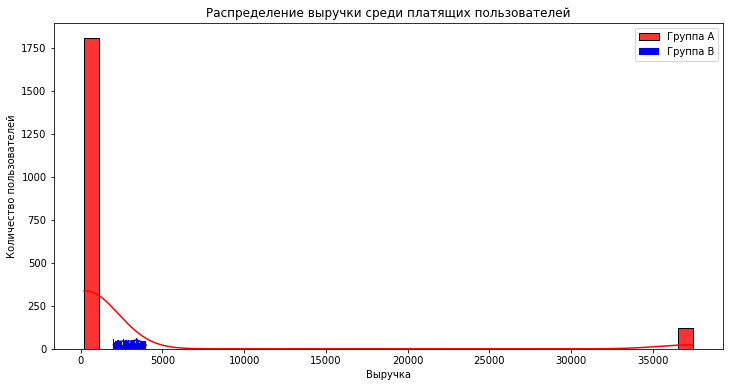

In [30]:
# Проверка распределений выручки через тест Манна-Уитни
stat, p_value = mannwhitneyu(revenue_a_nonzero, revenue_b_nonzero, alternative='two-sided')

print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу (H0): распределения выручки между группами существенно различаются.")
else:
    print("Не можем отклонить нулевую гипотезу (H0): распределения выручки между группами можно считать одинаковыми.")
    
# Визуализация распределений выручки
plt.figure(figsize=(12, 6))
sns.histplot(revenue_a_nonzero, bins=40, kde=True, label='Группа A', color='red', alpha=0.8)
sns.histplot(revenue_b_nonzero, bins=40, kde=True, label='Группа B', color='blue', alpha=1)
plt.title('Распределение выручки среди платящих пользователей')
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

            ВЫВОДЫ
1. Между группами нет статистически значимых различий в средней выручке на пользователя (ARPU). Изменение набора акционных предложений не привело к статистически значимому изменению среднего дохода с пользователя.
2. Между группами нет статистически значимых различий в средней выручке на платящего пользователя (ARPPU). Изменение набора акционных предложений не привело к статистически значимому изменению среднего дохода с платящего пользователя.
3. Конверсия в платящих пользователей (CR) в тестовой группе отличается от контрольной группы и статистически значима. CR контрольной группы - 0.95%, CR тестовой группы ниже и составляет 0.89%. Значит акционные предложения для тестовой группы менее привлекательны для новых платящих игроков.
4. Общий доход (Total Revenue) группы В больше и равна 5421603, в группе А = 5136189 (разница 285414).
5. Распределение выручки между группами существенно различаются. Это указывает на возможное нарушение сплитования или же предложенние было нацелено на более платежеспособных пользователей, в следствии чего конверсия ниже (0,89%), а итоговый доход выше.

        На вопрос "Какой набор предложений можно считать лучшим" на данном эатпе трудно ответить.
    1. Потребуется пересмотреть дизайн эксперимента и убедиться в корректности сплитования.
    2. Провести анализ LTV (Life-Time Value) - иследовать ценность пользователя в каждой из групп. Возможно акционные предложения тестовой группы приводят к меньшей конверсии, но привлекате больше "китов" и к более долгосрочной прибыли за их счёт.
    3. Провести RFM-сегментацию и проанализировать как каждый из сегментов реагирует на разные предложения.
    4. Провести анализ Retention. Как повлияют тестовые предложения на старых и новых игроков.

Если же подтвердится, что сплитование выполненно верно и эксперимент корректный (несмотря на сильные различия в распределении выручки) то:
Если цель увеличить Total Revenue, то тестовые предложения (группа B) обеспечивают бОльшую общую выручку.
Если цель увеличения конверсии (CR) - предложения контрольной группы (группа A) дают более лучшй результат.
Если цель долгосрочная прибыль, то потребуются дополнтельно провести анализ метрик LTV и Retention.


                                                    # Задание 3
В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

                        С помощью каких метрик можно оценить результаты последнего прошедшего события?

1. Метрики роста:
    
        1) DAU/MAU - сколько уникальных пользователей участвовало в событии.
        2) Retantion - сколько число игроков вернулось в игру в момент старта события; процент удержания игроков на период проведения мероприятия.
        3) Конверсия в игру (CR) - сколько игроков играло в событие по отношению к общему числу игроков игры.
        4) Churn rate - сколько игроков ушло после первой миссии события, то есть не продолжили играть (показывает заинтересованность в событии. Смогло ли оно сразу увлечь игроков).
        5) Total Revenue события.
        6) ARPU - повлияло ли событие на средний чек игрока

2. Метрики продукта:

        1) Сколько игроков закончили тематическое событие.
        2) Среднее число уровней, которое смогли пройти игроки.
        3) Самые сложные уровни, после которых уходило больше всего людей.
    
3. Качественные метрики:
        1) Обратная связь игроков - отзывы, рейтинг игры.

                Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?
                  
Данный механизм повлияет на набор метрик, потребуются дополнительно новые метрики для более точной оценки:

1. Среднее количество повторных попыток на уровне.
2. Сколько пользователей откатывалось назад хотя бы раз.
3. Среднее время игрока на уровень.
4. Churn rate false - сколько игроков ушло после первого провала в событии.
5. Затраты на игрока в месяц - есть ощущение, что сообщений в поддержку будет больше из-за увеличивающейся сложности казуальной игры.

Также усложнение игры повлияет на все предыдущие метрики (с примером возможного изменения метрик):
1. DAU/MAU - данное усложнение может как привлечь более хардкорных игроков, так и оттолкнуть казуальных.
2. Retantion
3. Конверсия в игру (CR)
4. Churn rate - для казуальной игры усложнение может изменить показания данной метрики
5. Total Revenue события - есть шанс, что усложнение вынудит прибегать к дополнительным внутриигровым покупкам, так и шанс, что ноборот оттолкнет от такого рода принуждения к покупкам
6. ARPU - также может измениться в связи с новыми покупками из-за усложнения игры
7. Сколько игроков закончили тематическое событие - так как событие ограничено по времени и могут проихсодить откаты, то это также повлияет на данную метрику
8. Среднее число уровней, которое смогли пройти игроки
9. Самые сложные уровни, после которых уходило больше всего людей - возможно данный показатель изменится, если игроков вообще стало забрасывать игру больше, то есть на более ранних этапах игры. 
10. Обратная связь игроков - отзывы, рейтинг игры - трудно сказать как изменится данная метрика. Окажется ли число казуальный игроков, недовольных событием, больше чем хаодкорных или тех, у кого есть различные пропуски/подписки/дополнительные паки. Всё зависит от реализации самого события.

Уверенно сказать как именно повлияет усложнение механики события на итоговый продукт невозможно без рассмотрения в деталях всех метрик и проведении А/В тестирования.